# ECON 622 Final Project - Tests of Linear Factor Models and Random Walk
### Yingxiang Li 
### yingxiang.li@sauder.ubc.ca

In [66]:
using Statistics, Distributions, LinearAlgebra, StatsBase, DelimitedFiles
using DataFrames, DelimitedFiles, Dates
using Base
using Plots

include("src/OLSFn.jl")
include("src/Covmoment.jl")
include("src/ap_test_time.jl")
include("src/ap_test_cross.jl")
include("src/ap_test_fm.jl")
include("src/rw_test.jl")

rw_test (generic function with 3 methods)

## Asset Pricing Tests

Load the monthly returns of portfolios double sorted on size and investment and the Fama-French 3 factors, both of which are downloaded from the Kenneth R. Frech's library.

In [67]:
Portfolios = readdlm("Data/25_Portfolios_ME_INV_5x5.csv", ',', skipstart = 1) 
FFFactors = readdlm("Data/F-F_Research_Data_Factors.csv", ',', skipstart = 1) 

666×5 Array{Float64,2}:
 196307.0  -0.39  -0.56  -0.83  0.27
 196308.0   5.07  -0.94   1.67  0.25
 196309.0  -1.57  -0.31   0.18  0.27
 196310.0   2.53  -0.54  -0.1   0.29
 196311.0  -0.85  -1.13   1.71  0.27
 196312.0   1.83  -1.97  -0.12  0.29
 196401.0   2.24  -0.19   1.59  0.3 
 196402.0   1.54   0.1    2.83  0.26
 196403.0   1.41   0.99   3.32  0.31
 196404.0   0.1   -1.37  -0.55  0.29
 196405.0   1.42  -0.9    1.98  0.26
 196406.0   1.27  -0.26   0.68  0.3 
 196407.0   1.74   0.28   0.68  0.3 
      ⋮                             
 201801.0   5.58  -3.04  -1.38  0.11
 201802.0  -3.65   0.25  -1.19  0.11
 201803.0  -2.35   3.95  -0.12  0.12
 201804.0   0.29   1.12   0.54  0.14
 201805.0   2.65   5.23  -3.16  0.14
 201806.0   0.48   1.18  -2.38  0.14
 201807.0   3.19  -2.18   0.4   0.16
 201808.0   3.44   1.15  -4.08  0.16
 201809.0   0.06  -2.37  -1.3   0.15
 201810.0  -7.68  -4.76   3.44  0.19
 201811.0   1.69  -0.79   0.25  0.18
 201812.0  -9.55  -2.63  -1.47  0.19

Calculate the excess return for each portfolio

In [68]:
r = Portfolios[:, 2:end];
factors = FFFactors[:, 2:4];
rf = FFFactors[:, 5];
r = r.*(1 - (r == - 99.99));
(T, K) = size(factors);
N = size(r,2);
re = r .- rf * ones(1,N)

666×25 Array{Float64,2}:
  -0.2327   -2.0078   -1.0025   -2.1036  …   0.1335   0.0337    0.8788
   4.1664    1.9969    1.5442    1.0346      6.0456   5.4999    6.5333
  -0.7424   -1.1203   -1.5106    0.8346     -3.1945  -1.7835   -2.1966
   0.3045   -0.9896    1.3831    1.636       0.528    3.2474    3.6739
  -3.6346    0.2576   -3.4214   -3.9693     -1.2791  -0.4138   -0.2184
  -2.9289   -0.4484    0.7308   -3.0651  …   1.2593   1.3121    1.1647
   7.3298    5.2567    3.6786    4.801       1.7398   1.7397   -2.0245
   2.2325   -0.695     3.242     1.2454      1.5449   1.5046    2.8844
   4.9999    4.1354    0.836     1.9313      0.5574  -0.1619    1.8178
   0.8293   -1.6317    0.3245   -0.3781      0.8614  -0.5764    1.433 
   1.2308    0.8424   -1.236    -0.7429  …   1.1472   0.4715    0.0688
  -0.2673    1.063     1.5268    1.3706      2.3027   1.1351    1.158 
   2.8795    3.9997    3.4028    3.1214      2.5605   1.9657    1.8679
   ⋮                                     ⋱          

### Time-Series Tests
The betas are defined by the time-series regression coefficients

$$R_{t}^{ei} = \alpha_{i} + \beta_{i}' f_{t} + e_{t}^{i}, t = 1, 2, \cdots, T \text{ for each i}$$

and the asset pricing model states that the expected returns are linear in the betas:

$$E(R^{ei}) = \beta_{i}' E(f_{t}) $$

Asset pricing models predict a restriction on the intercepts of the time-series regressions. The asset pricing model is valid if the intercepts of time-series regressions are jointly zero. The null hypothesis of the Wald test is 

$$H_{0}: \alpha_{1} = \alpha_{2} = \alpha_{3} = \cdots = \alpha_{N} = 0$$

There are four tests - OLS asymptotic, OLS with finite-sample adjustment (i.e. Gibbons Ross and Shanken (1989) test statistics), GMM asymptotic and GMM with finite-sample adjustment. Please refer to Cochrane (2000) for details

In [69]:
(alpha, beta, resid, cov_resid, test_statistics_time, pvalue_time) = ap_test_time(re, factors, "NW", 4, "asymptotic");
@show test_statistics_time
@show  pvalue_time

test_statistics_time = [163.41188864898953]
pvalue_time = [0.0]


1-element Array{Float64,1}:
 0.0

In [70]:
(alpha, beta, resid, cov_resid, test_statistics_time, pvalue_time) = ap_test_time(re, factors, "NW", 4, "finite");
@show test_statistics_time
@show  pvalue_time

test_statistics_time = [6.26166876624957]
pvalue_time = [0.0]


1-element Array{Float64,1}:
 0.0

In [71]:
(alpha, beta, resid, cov_resid, test_statistics_time, pvalue_time) = ap_test_time(re, factors, "NW", 4, "GMM asymptotic");
@show test_statistics_time
@show  pvalue_time

test_statistics_time = 163.80845181345143
pvalue_time = 0.0


0.0

In [72]:
(alpha, beta, resid, cov_resid, test_statistics_time, pvalue_time) = ap_test_time(re, factors, "NW", 4, "GMM finite");
@show test_statistics_time
@show  pvalue_time

test_statistics_time = [6.27686439981874]
pvalue_time = [0.0]


1×1 Array{Float64,2}:
 0.0

### Cross-Sectional Tests
For cross-sectional tests, the central economic question is why average returns vary across assets: expected returns of an asset should be high if that asset has high betas or risk exposure to factors that carry high risk premia. We can fit

$$E_{T}(R^{ei}) = \beta_{i}'\lambda + \alpha_{i}, i = 1, 2, \cdots, N$$

with a two-pass regression estimation procedure
- First-stage: time-series regressions of excess returns on factors to obtain estimates of $\beta_{i}$ for each assets  $i$
- Second-stage: cross-sectional regressions (without intercept) of time-series average returns on estiamted betas to obtain risk premium $\gamma$ for each assets

Asset pricing models predict a restriction on the error terms of the second-stage cross-sectional regressions. The asset pricing model is valid if the error terms of cross-sectional regressions are jointly zero-mean. The null hypothesis of the Wald test is 

$$H_{0}: \alpha_{1} = \alpha_{2} = \alpha_{3} = \cdots = \alpha_{N} = 0$$

There are six tests - OLS, GLS, OLS wiht Shanken correction, GLS with Shanken correction, GMM and GLS GMM that exploit the moment conditions in the first-stage time-series regressions and second-stage cross-sectional regression. Please refer to Cochrane (2000) for details.


In [73]:
(Ere, lambda, alpha_cross, test_statistics_cross, pvalue_cross) = ap_test_cross(re, factors, "NW", 4, "OLS");
@show test_statistics_cross
@show pvalue_cross

test_statistics_cross = [132.08878100583252]
pvalue_cross = [0.0]


1×1 Array{Float64,2}:
 0.0

In [74]:
(Ere, lambda, alpha_cross, test_statistics_cross, pvalue_cross) = ap_test_cross(re, factors, "NW", 4, "GLS");
@show test_statistics_cross
@show pvalue_cross

test_statistics_cross = [132.0887810058398]
pvalue_cross = [0.0]


1×1 Array{Float64,2}:
 0.0

In [75]:
(Ere, lambda, alpha_cross, test_statistics_cross, pvalue_cross) = ap_test_cross(re, factors, "NW", 4, "Shanken");
@show test_statistics_cross
@show pvalue_cross

test_statistics_cross = [114.63609527856971]
pvalue_cross = [1.63202784619898e-14]


1×1 Array{Float64,2}:
 1.63202784619898e-14

In [76]:
(Ere, lambda, alpha_cross, test_statistics_cross, pvalue_cross) = ap_test_cross(re, factors, "NW", 4, "GLS Shanken");
@show test_statistics_cross
@show pvalue_cross

test_statistics_cross = [147.44487479532486]
pvalue_cross = [0.0]


1×1 Array{Float64,2}:
 0.0

In [77]:
(Ere, lambda, alpha_cross, test_statistics_cross, pvalue_cross) = ap_test_cross(re, factors, "NW", 4, "GMM");
@show test_statistics_cross
@show pvalue_cross

test_statistics_cross = [69.83652203907619]
pvalue_cross = [7.01784127477012e-7]


1×1 Array{Float64,2}:
 7.01784127477012e-7

In [78]:
(Ere, lambda, alpha_cross, test_statistics_cross, pvalue_cross) = ap_test_cross(re, factors, "NW", 4, "GLS GMM");
@show test_statistics_cross
@show pvalue_cross

test_statistics_cross = [62.32110420648595]
pvalue_cross = [1.0069093722031575e-5]


1×1 Array{Float64,2}:
 1.0069093722031575e-5

### Cross-Sectional Test Using the Fama-MacBeth Procedure
Instead of estimating a single cross-sectinal regressions with teh sample averages, the Fama-MacBeth (1973) precedure runs a cross-sectional regression at each time period, i.e.
$$R_{t}^{ei} = \beta_{i}'\lambda_{t} + \alpha_{it}, i = 1, 2, \cdots, N \text{ for each t}$$

Then $\alpha = (\alpha_{1}, \alpha_{2}, \cdots, \alpha_{N})'$ is estimated as the the time-series sample average for each test assets:
$$\alpha = \frac{1}{T}\sum_{t=1}^{T}\alpha_{t}$$

Its covariance matrix is estimated as:
$$cov(\alpha) = \frac{1}{T} \sum_{t=1}^{T}(\alpha_{t} - \alpha)(\alpha_{t} - \alpha)'$$

Fama-MacBeth standard errors do not include corrections for the fact that the betas are also estimated. The Wald test is
$$\alpha' cov(\alpha)^{-1} \alpha \sim \chi_{N-K}^{2}$$

and the null hypothesis is 
$$H_{0}: \alpha_{1} = \alpha_{2} = \cdots = \alpha_{N} = 0$$

In [79]:
(alpha_fm, test_statistics_fm, pvalue_fm) = ap_test_fm(re, factors)
@show [test_statistics_fm, pvalue_fm]

[test_statistics_fm, pvalue_fm] = Array{Float64,2}[[166.81150836795896], [0.0]]


2-element Array{Array{Float64,2},1}:
 [166.81150836795896]
 [0.0]               

## Tests of Random Walk
Random walk with uncorrelated increments (RW3) is the weakest form version of the random walk. The other versions are random walk with iid increments (RW1) and random walk with independent increments (RW2).  There are three major tests of random walk in Campbell, Ho and Mackinley (1997). They are 
- Box and Pierce (1970) test of RW(3): the autocorrelation of increments at all leads and lags should be zero under random walk. By summing the squared autocorrelation, the Box-Pierce Q-statistics is designed to detect departures from zero autocorrelations in either directions and at all lags. 
- Ljung and Box (1978) test of RW(3): the Ljung-Box Q-statistics provides the finite-sample correction which yields a better fit to the chi-squared distribution for small sample size.
- Variance ratio test of RW(1): the variance of random walk increments must be a linear function of the time interval under random walk. The variance ratios statistics tests such property.

The null hypothesis is that the price of the underlying asset follows random walk. Please refer to Campbell, Ho and Mackinley (1997) for more details. The tests in general are sensitive the the number of lags for autocorrelations in the tests.

We start with the daily price of the SP500 and then switch to montly price of SP500 collected from the Yahoo! finance


In [80]:
SP500_daily = readdlm("Data/GSPC_daily.csv", ',', skipstart = 1) 

4527×7 Array{Any,2}:
 "2001-01-02"  1320.28  1320.28  1276.05  1283.27  1283.27  1129400000
 "2001-01-03"  1283.27  1347.76  1274.62  1347.56  1347.56  1880700000
 "2001-01-04"  1347.56  1350.24  1329.14  1333.34  1333.34  2131000000
 "2001-01-05"  1333.34  1334.77  1294.95  1298.35  1298.35  1430800000
 "2001-01-08"  1298.35  1298.35  1276.29  1295.86  1295.86  1115500000
 "2001-01-09"  1295.86  1311.72  1295.14  1300.8   1300.8   1191300000
 "2001-01-10"  1300.8   1313.76  1287.28  1313.27  1313.27  1296500000
 "2001-01-11"  1313.27  1332.19  1309.72  1326.82  1326.82  1411200000
 "2001-01-12"  1326.82  1333.21  1311.59  1318.55  1318.55  1276000000
 "2001-01-16"  1318.32  1327.81  1313.33  1326.65  1326.65  1205700000
 "2001-01-17"  1326.65  1346.92  1325.41  1329.47  1329.47  1349100000
 "2001-01-18"  1329.89  1352.71  1327.41  1347.97  1347.97  1445000000
 "2001-01-19"  1347.97  1354.55  1336.74  1342.54  1342.54  1407800000
 ⋮                                                    ⋮ 

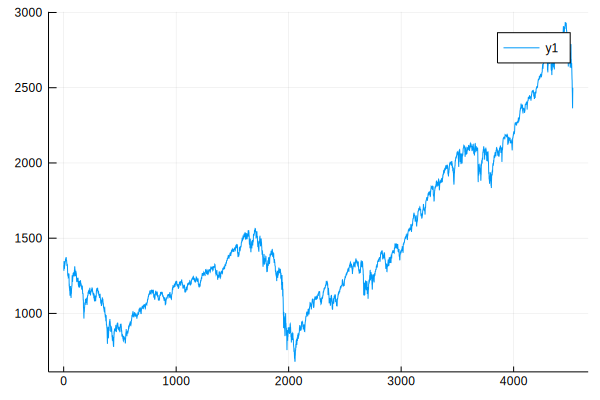

In [81]:
p_daily = SP500_daily[:, 2];
plot(p_daily)

In [82]:
(test_statistics, pvalue) = rw_test(p_daily, "BP", 28)
@show test_statistics
@show pvalue

test_statistics = [103.75029759356744]
pvalue = [1.2385004133363964e-10]


1-element Array{Float64,1}:
 1.2385004133363964e-10

In [83]:
(test_statistics, pvalue) = rw_test(p_daily, "LB", 28)
@show test_statistics
@show pvalue

test_statistics = [104.44227378916705]
pvalue = [9.533751565982129e-11]


1-element Array{Float64,1}:
 9.533751565982129e-11

In [84]:
(test_statistics, pvalue) = rw_test(p_daily, "VR", 20)
@show test_statistics
@show pvalue

test_statistics = [-9.898198154914231]
pvalue = [1.0]


1-element Array{Float64,1}:
 1.0

In [85]:
SP500_monthly = readdlm("Data/GSPC_monthly.csv", ',', skipstart = 1) 

217×7 Array{Any,2}:
 "2001-01-01"  1320.28  1383.37  1274.62  1366.01  1366.01  27829800000
 "2001-02-01"  1366.01  1376.38  1215.44  1239.94  1239.94  21644400000
 "2001-03-01"  1239.94  1267.42  1081.19  1160.33  1160.33  27806610000
 "2001-04-01"  1160.33  1269.3   1091.99  1249.46  1249.46  25409990000
 "2001-05-01"  1249.46  1315.93  1232.0   1255.82  1255.82  24525900000
 "2001-06-01"  1255.82  1286.62  1203.03  1224.38  1224.38  24748030000
 "2001-07-01"  1224.42  1239.78  1165.54  1211.23  1211.23  23793710000
 "2001-08-01"  1211.23  1226.27  1124.87  1133.58  1133.58  23359200000
 "2001-09-01"  1133.58  1155.4    944.75  1040.94  1040.94  25025290000
 "2001-10-01"  1040.94  1110.61  1026.76  1059.78  1059.78  29951280000
 "2001-11-01"  1059.78  1163.38  1054.31  1139.45  1139.45  26330000000
 "2001-12-01"  1139.45  1173.62  1114.53  1148.08  1148.08  25128570000
 "2002-01-01"  1148.08  1176.97  1081.66  1130.2   1130.2   29746200000
 ⋮                                          

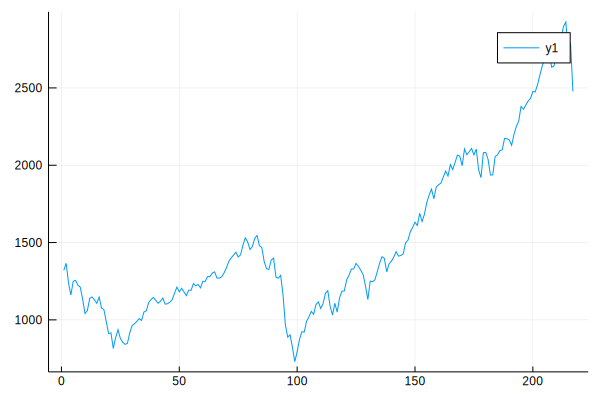

In [86]:
p_monthly = SP500_monthly[:, 2];
plot(p_monthly)

In [87]:
(test_statistics, pvalue) = rw_test(p_monthly, "BP", 12)
@show test_statistics
@show pvalue

test_statistics = [15.059135648362021]
pvalue = [0.23821840835484098]


1-element Array{Float64,1}:
 0.23821840835484098

In [88]:
(test_statistics, pvalue) = rw_test(p_monthly, "LB", 12)
@show test_statistics
@show pvalue

test_statistics = [16.092605741877062]
pvalue = [0.1870312777990084]


1-element Array{Float64,1}:
 0.1870312777990084

In [89]:
(test_statistics, pvalue) = rw_test(p_monthly, "VR", 12)
@show test_statistics
@show pvalue

test_statistics = [4.7016907891246325]
pvalue = [1.2900801078519208e-6]


1-element Array{Float64,1}:
 1.2900801078519208e-6